In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [19]:
N = 64 # points
f0 = 7.5

In [32]:
x = np.cos(2*np.pi*f0/N*np.arange(N))

# since the fft is symmetric around 0, we can span N/2 to N/2
nv = np.arange(-N/2, N/2)
fv = np.arange(-N/2, N/2)

In [33]:
X = np.array([])

In [34]:
for f in nv:
    # make a complex sine wave that will have a real and imaginary part
    s = np.exp(1j * 2 * np.pi * f / N * nv)
    
    # dot product with input signal. This is like taking out input signal and doing a cross-correlation.
    # the complex sinusoid with frequency f that has the biggest overlap will have the largest dot product
    # this is waht we are seeing as the output of the DFT
    X = np.append(X, sum(x*np.conjugate(s)))

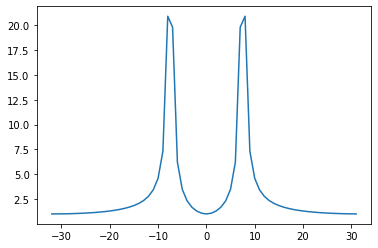

In [35]:
plt.plot(fv, abs(X))

perform inverse DFT to get reconstructed signal from complex sinusoids

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[-32.0, 32.0, -1, 1]

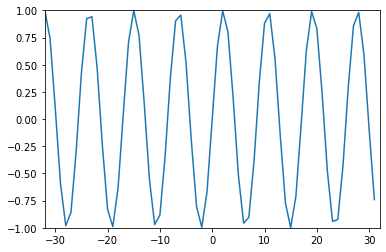

In [45]:
y = np.array([])
# at each point in the input signal, multiply complex sinusoids by coefficients found in the DFT
for n in nv:
    s = np.exp(1j * 2 * np.pi * n / N * nv)
    
    y = np.append(y, 1.0/N * (np.sum(X*s)))
    
plt.plot(fv, y)
plt.axis([-N/2, N/2, -1, 1])
